# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [14]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://ycharts.com/companies/TSLA/revenues"

# Crea una sesión para mantener las cookies y configuraciones
session = requests.Session()

# Actualiza el encabezado de la sesión con un User-Agent válido para simular que la solicitud viene de un navegador real. Esto ayuda a evitar bloqueos
session.headers.update({"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36"})

# Realiza una solicitud GET a la URL
response = session.get(url)

time.sleep(2)

if response.status_code == 403:
    print("Acceso denegado, verifique las cabeceras o espere.")
else:
    html_data = response.text

html_data

'\n\n\n\n\n\n\n\n\n<!doctype html>\n<html lang="en" ng-jq>\n    <head>\n        <title>\n        Tesla Revenue (Quarterly) Analysis | YCharts\n        </title>\n\n        <meta name="viewport" content="width=device-width, initial-scale=1.0" />\n<!-- This code allows us to correctly display the page on mobile devices -->\n<script defer>\n    var viewport = document.querySelector(\'meta[name=viewport]\');\n    if (viewport) {\n        var minWidth = 700;\n        if (screen.width < minWidth) {\n            document.head.removeChild(viewport);\n            var newViewport = document.createElement(\'meta\');\n            newViewport.setAttribute(\'name\', \'viewport\');\n            newViewport.setAttribute(\'content\', \'width=\' + minWidth);\n            document.head.appendChild(newViewport);\n        }\n    }\n</script>\n\n\n        \n        <script>\n    if (navigator.userAgent.indexOf(\'Trident\') !== -1 || navigator.userAgent.indexOf(\'MSIE\') !== -1) {\n        window.onload=funct

In [15]:

from bs4 import BeautifulSoup

# Transformamos el HTML plano en un HTML real (estructurado y anidado, con forma de árbol)
soup = BeautifulSoup(response.text, 'html.parser') #

soup


<!DOCTYPE html>

<html lang="en" ng-jq="">
<head>
<title>
        Tesla Revenue (Quarterly) Analysis | YCharts
        </title>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<!-- This code allows us to correctly display the page on mobile devices -->
<script defer="">
    var viewport = document.querySelector('meta[name=viewport]');
    if (viewport) {
        var minWidth = 700;
        if (screen.width < minWidth) {
            document.head.removeChild(viewport);
            var newViewport = document.createElement('meta');
            newViewport.setAttribute('name', 'viewport');
            newViewport.setAttribute('content', 'width=' + minWidth);
            document.head.appendChild(newViewport);
        }
    }
</script>
<script>
    if (navigator.userAgent.indexOf('Trident') !== -1 || navigator.userAgent.indexOf('MSIE') !== -1) {
        window.onload=function() {
            var ie_banner = document.createElement('div');
            ie_banner.innerT

In [28]:
tables = soup.find_all("table")

tables 


[<table class="table">
 <thead>
 <tr>
 <th>Date</th>
 <th class="text-right">Value</th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td>September 30, 2024</td>
 <td class="text-right">
                             
                                 25.18B
                             
                         </td>
 </tr>
 <tr>
 <td>June 30, 2024</td>
 <td class="text-right">
                             
                                 25.50B
                             
                         </td>
 </tr>
 <tr>
 <td>March 31, 2024</td>
 <td class="text-right">
                             
                                 21.30B
                             
                         </td>
 </tr>
 <tr>
 <td>December 31, 2023</td>
 <td class="text-right">
                             
                                 25.17B
                             
                         </td>
 </tr>
 <tr>
 <td>September 30, 2023</td>
 <td class="text-right">
                             
              

In [35]:
for index, table in enumerate(tables):
    print(f"Tabla {index}:")
    print(table.prettify())  # Esto imprimirá la tabla en un formato más legible


Tabla 0:
<table class="table">
 <thead>
  <tr>
   <th>
    Date
   </th>
   <th class="text-right">
    Value
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    September 30, 2024
   </td>
   <td class="text-right">
    25.18B
   </td>
  </tr>
  <tr>
   <td>
    June 30, 2024
   </td>
   <td class="text-right">
    25.50B
   </td>
  </tr>
  <tr>
   <td>
    March 31, 2024
   </td>
   <td class="text-right">
    21.30B
   </td>
  </tr>
  <tr>
   <td>
    December 31, 2023
   </td>
   <td class="text-right">
    25.17B
   </td>
  </tr>
  <tr>
   <td>
    September 30, 2023
   </td>
   <td class="text-right">
    23.35B
   </td>
  </tr>
  <tr>
   <td>
    June 30, 2023
   </td>
   <td class="text-right">
    24.93B
   </td>
  </tr>
  <tr>
   <td>
    March 31, 2023
   </td>
   <td class="text-right">
    23.33B
   </td>
  </tr>
  <tr>
   <td>
    December 31, 2022
   </td>
   <td class="text-right">
    24.32B
   </td>
  </tr>
  <tr>
   <td>
    September 30, 2022
   </td>
   <td clas

In [74]:
table_indices = [0, 1]  # Índices de las tablas a concatenar

# Crear una lista para almacenar los DataFrames
dfs = []

# Iterar sobre los índices de las tablas seleccionadas
for table_index in table_indices:
    # Extraer las filas de la tabla
    rows = tables[table_index].find_all('tr')
    
    # Crear una lista para almacenar los datos de cada tabla
    data = []
    
    # Extraer los encabezados de las columnas
    headers = [header.text.strip() for header in rows[0].find_all('th')]
    
    # Si no hay encabezados en la tabla, puedes asumir nombres genéricos
    if not headers:
        headers = ["Column " + str(i) for i in range(len(rows[0].find_all('td')))]
    
    # Extraer los datos de las filas
    for row in rows[1:]:
        cols = row.find_all('td')
        if len(cols) > 0:  # Si la fila tiene datos
            data.append([col.text.strip() for col in cols])
    
    # Convertir los datos a un DataFrame
    df = pd.DataFrame(data, columns=headers)
    dfs.append(df)

# Concatenar los DataFrames en una sola tabla
tesla_revenue = pd.concat(dfs, ignore_index=True)

# Mostrar el DataFrame concatenado
print(tesla_revenue)

                  Date    Value
0   September 30, 2024   25.18B
1        June 30, 2024   25.50B
2       March 31, 2024   21.30B
3    December 31, 2023   25.17B
4   September 30, 2023   23.35B
5        June 30, 2023   24.93B
6       March 31, 2023   23.33B
7    December 31, 2022   24.32B
8   September 30, 2022   21.45B
9        June 30, 2022   16.93B
10      March 31, 2022   18.76B
11   December 31, 2021   17.72B
12  September 30, 2021   13.76B
13       June 30, 2021   11.96B
14      March 31, 2021   10.39B
15   December 31, 2020   10.74B
16  September 30, 2020   8.771B
17       June 30, 2020   6.036B
18      March 31, 2020   5.985B
19   December 31, 2019   7.384B
20  September 30, 2019   6.303B
21       June 30, 2019    6.35B
22      March 31, 2019   4.541B
23   December 31, 2018   7.226B
24  September 30, 2018   6.824B
25       June 30, 2018   4.002B
26      March 31, 2018   3.409B
27   December 31, 2017   3.288B
28  September 30, 2017   2.985B
29       June 30, 2017   2.790B
30      

In [75]:
print(tesla_revenue.columns) #Imprimimos el nombre de las columnas para saber como graficarlos

Index(['Date', 'Value'], dtype='object')


In [79]:
def convert_value(value):
    # Si el valor es un string
    if isinstance(value, str):
        if 'B' in value:
            # Eliminar 'B' y convertir a float, multiplicar por 1,000,000,000
            return float(value.replace('B', '').strip()) * 1e9
        elif 'M' in value:
            # Eliminar 'M' y convertir a float, multiplicar por 1,000,000
            return float(value.replace('M', '').strip()) * 1e6
    # Si el valor ya es un número (float), devolverlo tal cual
    return value

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenamos la tabla según la fecha para que aparezca bien en el gráfico
tesla_revenue = tesla_revenue.sort_values(by='Date', ascending = True)

# Convertir la columna "Date" a formato datetime
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
tesla_revenue['Value'] = tesla_revenue['Value'].apply(convert_value)

# Verificar si hay valores NaN en la columna 'Date'
print(tesla_revenue[tesla_revenue['Date'].isna()])

# Verificar si hay valores NaN en la columna 'Value'
print(tesla_revenue[tesla_revenue['Value'].isna()])


Empty DataFrame
Columns: [Date, Value]
Index: []
Empty DataFrame
Columns: [Date, Value]
Index: []


In [ ]:

# Verificar si los datos están bien ordenados y completos
print(tesla_revenue)


         Date         Value
49 2012-06-30  2.665000e+07
48 2012-09-30  5.010000e+07
47 2012-12-31  3.063300e+08
46 2013-03-31  5.617900e+08
45 2013-06-30  4.051400e+08
44 2013-09-30  4.313500e+08
43 2013-12-31  6.152200e+08
42 2014-03-31  6.205400e+08
41 2014-06-30  7.693500e+08
40 2014-09-30  8.518000e+08
39 2014-12-31  9.566600e+08
38 2015-03-31  9.398800e+08
37 2015-06-30  9.549800e+08
36 2015-09-30  9.367900e+08
35 2015-12-31  1.214000e+09
34 2016-03-31  1.147000e+09
33 2016-06-30  1.270000e+09
32 2016-09-30  2.298000e+09
31 2016-12-31  2.285000e+09
30 2017-03-31  2.696000e+09
29 2017-06-30  2.790000e+09
28 2017-09-30  2.985000e+09
27 2017-12-31  3.288000e+09
26 2018-03-31  3.409000e+09
25 2018-06-30  4.002000e+09
24 2018-09-30  6.824000e+09
23 2018-12-31  7.226000e+09
22 2019-03-31  4.541000e+09
21 2019-06-30  6.350000e+09
20 2019-09-30  6.303000e+09
19 2019-12-31  7.384000e+09
18 2020-03-31  5.985000e+09
17 2020-06-30  6.036000e+09
16 2020-09-30  8.771000e+09
15 2020-12-31  1.074

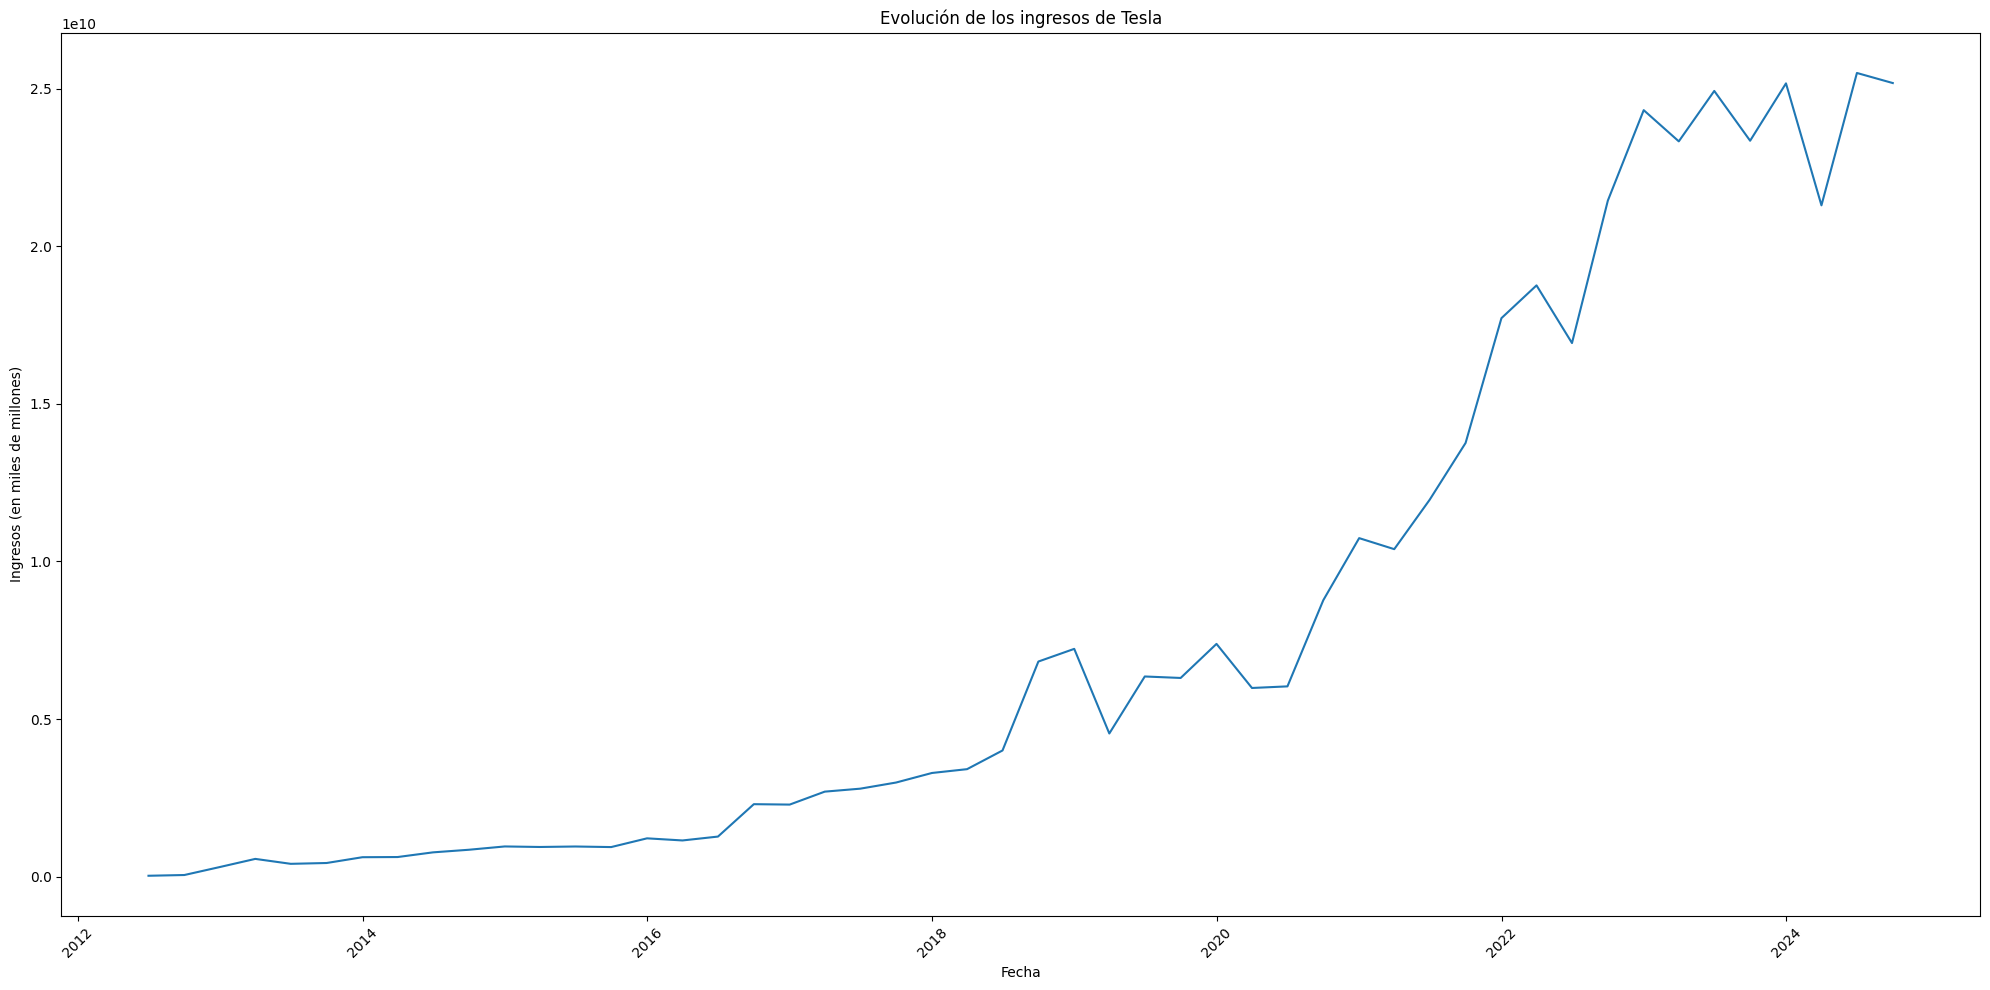

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(20, 10))
sns.lineplot(data=tesla_revenue, x='Date', y='Value')

plt.title('Evolución de los ingresos de Tesla')
plt.xlabel('Fecha')
plt.ylabel('Ingresos (en miles de millones)')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()